In [1]:
from sklearn import datasets
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from adalaine import Adalaine
from lms import LMS
np.random.seed(0)

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [10, 5], 
          'axes.labelsize': 10,
          'axes.titlesize':14, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 8, 
          'ytick.labelsize': 8
         }
plt.rcParams.update(params)

In [3]:
dataset1 = pd.read_csv('./datasets/dataset_regression.csv', sep=";", header = None, names=['y', 'x'])
y = dataset1['y'].values
x = dataset1['x'].values


# PARTE I

In [4]:
#Treinando o Adalaine para diferentes passos de adaptação
ada1 = Adalaine(learning_rate = 2e-5, epochs = 45000)
ada1.fit(x, y)
ada2 = Adalaine(learning_rate = 2e-8, epochs = 45000)
ada2.fit(x, y)
ada3 = Adalaine(learning_rate = 2e-11, epochs = 45000)
ada3.fit(x, y)

In [5]:
#Treinando o LMS
lms = LMS()
lms.fit(x, y)

## Equação obtida

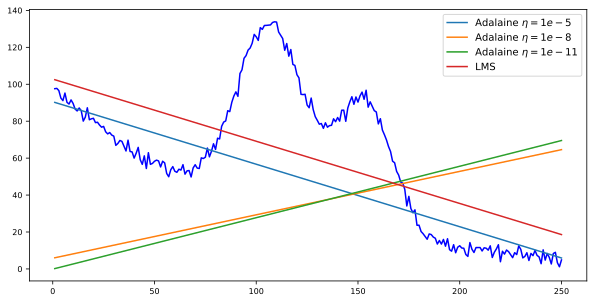

In [6]:
y_func1= ada1.weights[0]*x + ada1.bias_weights[0]
y_func2= ada2.weights[0]*x + ada2.bias_weights[0]
y_func3= ada3.weights[0]*x + ada3.bias_weights[0]
y_func4= lms.weights[0]*x + lms.weights[1]

plt.plot(x,y, color = 'blue')
plt.plot(x,y_func1, label = r'Adalaine $\eta = 1e-5$')
plt.plot(x,y_func2, label = r'Adalaine $\eta = 1e-8$')
plt.plot(x,y_func3, label = r'Adalaine $\eta = 1e-11$')
plt.plot(x,y_func4, label = 'LMS')
plt.legend()
plt.show()

## Erro Adalaine por época (MSE)

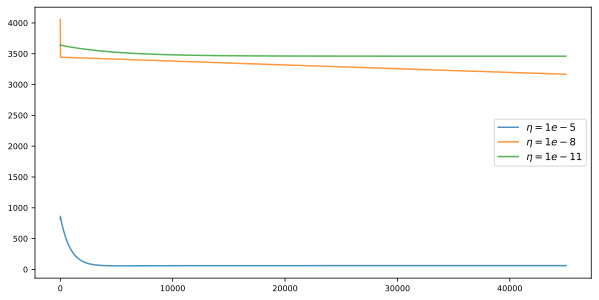

In [7]:
Xp = np.arange(45000)
plt.plot(Xp, ada1.mse_errors_epoch, alpha=0.80, label = r'$\eta = 1e-5$')
plt.plot(Xp, ada2.mse_errors_epoch, alpha=0.80, label = r'$\eta = 1e-8$')
plt.plot(Xp, ada3.mse_errors_epoch, alpha=0.80, label = r'$\eta = 1e-11$')
plt.legend()
plt.show()


## ERRO FINAL ADALAINE VS LMS

In [8]:
lms_predict = lms.predict(x);
ada_predict1 = ada1.predict(x);
ada_predict2 = ada2.predict(x);
ada_predict3 = ada3.predict(x);

MSE_lsm = np.square(np.mean(lms_predict - y))
MSE_ada1 = np.square(np.mean(ada_predict1 - y))
MSE_ada2 = np.square(np.mean(ada_predict2 - y))
MSE_ada3 = np.square(np.mean(ada_predict3 - y))


In [9]:
print(f'Erro final LMS: {MSE_lsm}')
print(f'Erro final Adalaine n = 1e-5: {MSE_ada1}')
print(f'Erro final Adalaine n = 1e-8: {MSE_ada2}')
print(f'Erro final Adalaine n = 1e-11: {MSE_ada3}')

Erro final LMS: 2.916134776676201e-29
Erro final Adalaine n = 1e-5: 155.76177692398142
Erro final Adalaine n = 1e-8: 635.6323242219834
Erro final Adalaine n = 1e-11: 659.0466387268963


### Comentários

Ao compararmos o LSM e o Adalaine podemos observar que para essa dataset se saiu melhor já que o erro de treinamento é menor para o LSM como mostrado acima. Outro aspecto importante é que o LSM aqui utilizado é determinístico, não precisa iterar pelos dados, mas tendo uma fórmula na qual visa diminuior o ERRO. O Adalaine além de ser mais demorado, pois depende do tamanho das épocas o resultado também depende do passo de adaptação, então temos a seguinte relação, quanto menor o passo de adaptação, mais o algoritmo demora para convergir, como mostrado pelo gráfico acima, com mais de 45mil iterações o algoritmo com um passo de adaptação pequeno não chegou nem perto de convergir para um erro pequeno enqunato o para erro de 1e-5 rapidamente convergiu se comparado com o de 1e-8 e 1e-11.

## PARTE II

In [10]:
xTrain, xTest, yTrain, yTest = tts(x, y, shuffle = True, test_size = 0.50)


In [11]:
#Treinando o Adalaine para diferentes passos de adaptação
ada1 = Adalaine(learning_rate = 2e-5, epochs = 45000)
ada1.fit(xTrain, yTrain)
ada2 = Adalaine(learning_rate = 2e-8, epochs = 45000)
ada2.fit(xTrain, yTrain)
ada3 = Adalaine(learning_rate = 2e-11, epochs = 45000)
ada3.fit(xTrain, yTrain)

## Adalaine Erro por época (MSE)

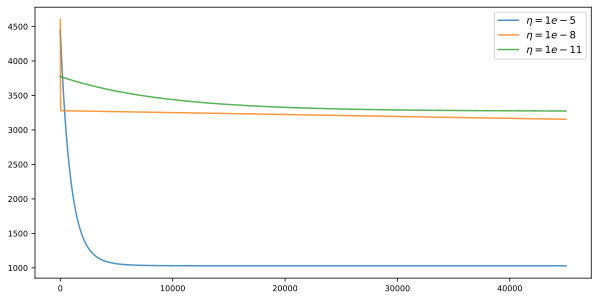

In [12]:
Xp = np.arange(45000)
plt.plot(Xp, ada1.mse_errors_epoch, alpha=0.80, label = r'$\eta = 1e-5$')
plt.plot(Xp, ada2.mse_errors_epoch, alpha=0.80, label = r'$\eta = 1e-8$')
plt.plot(Xp, ada3.mse_errors_epoch, alpha=0.80, label = r'$\eta = 1e-11$')
plt.legend()
plt.show()

## Erro de Teste

In [13]:
ada_predict1 = ada1.predict(xTest);
ada_predict2 = ada2.predict(xTest);
ada_predict3 = ada3.predict(xTest);

MSE_ada1 = np.square(np.mean(ada_predict1 - yTest))
MSE_ada2 = np.square(np.mean(ada_predict2 - yTest))
MSE_ada3 = np.square(np.mean(ada_predict3 - yTest))

In [14]:
print(f'Erro teste Adalaine n = 1e-5: {MSE_ada1}')
print(f'Erro teste Adalaine n = 1e-8: {MSE_ada2}')
print(f'Erro teste Adalaine n = 1e-11: {MSE_ada3}')

Erro teste Adalaine n = 1e-5: 77.91506766261172
Erro teste Adalaine n = 1e-8: 789.8731234713794
Erro teste Adalaine n = 1e-11: 917.0602731346556


### Comentários

Observamos que tanto para o erro de treinamento quanto o treinamento de teste não há uma mudança significativa para os erros. 

## PARTE III

In [25]:
xTrain, xTest, yTrain, yTest = tts(x, y, shuffle = True, test_size = 0.75)


In [26]:
#Treinando o Adalaine para diferentes passos de adaptação
ada1 = Adalaine(learning_rate = 2e-5, epochs = 45000)
ada1.fit(xTrain, yTrain)
ada2 = Adalaine(learning_rate = 2e-8, epochs = 45000)
ada2.fit(xTrain, yTrain)
ada3 = Adalaine(learning_rate = 2e-11, epochs = 45000)
ada3.fit(xTrain, yTrain)

## Adalaine Erro por época (MSE)

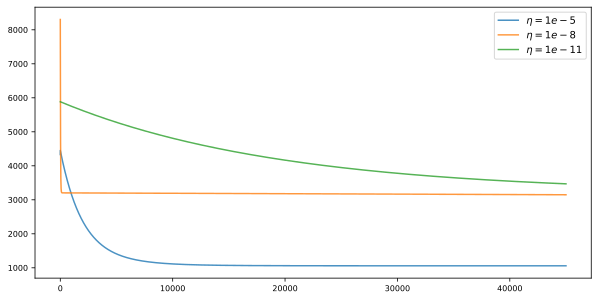

In [27]:
Xp = np.arange(45000)
plt.plot(Xp, ada1.mse_errors_epoch, alpha=0.80, label = r'$\eta = 1e-5$')
plt.plot(Xp, ada2.mse_errors_epoch, alpha=0.80, label = r'$\eta = 1e-8$')
plt.plot(Xp, ada3.mse_errors_epoch, alpha=0.80, label = r'$\eta = 1e-11$')
plt.legend()
plt.show()

## Erro de Teste

In [28]:
ada_predict1 = ada1.predict(xTest);
ada_predict2 = ada2.predict(xTest);
ada_predict3 = ada3.predict(xTest);

MSE_ada1 = np.square(np.mean(ada_predict1 - yTest))
MSE_ada2 = np.square(np.mean(ada_predict2 - yTest))
MSE_ada3 = np.square(np.mean(ada_predict3 - yTest))

In [29]:
print(f'Erro teste Adalaine n = 1e-5: {MSE_ada1}')
print(f'Erro teste Adalaine n = 1e-8: {MSE_ada2}')
print(f'Erro teste Adalaine n = 1e-11: {MSE_ada3}')

Erro teste Adalaine n = 1e-5: 365.6668966033325
Erro teste Adalaine n = 1e-8: 402.02955612174054
Erro teste Adalaine n = 1e-11: 1199.301562370288


### Comentários

Observamos que o padrão do erro se mantém para erro de treinamento, porém a convergencia do erro demora mais épocas do que o primeiro e o segundo caso e também podemos observar que o erro de teste subiu consideravelmente em relação ao ultimo teste com 50%